# Exploratory Analysis Step (Etapa de Análise Exploratória)

## Table of Contents
* [Packages](#1)
* [Exploratory Analysis](#2)
    * [Feature Engineering](#2.1)

<a name="1"></a>
## Packages (Pacotes)


In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import re

<a name="2"></a>
## Exploratory Analysis

In [114]:
comics_data = pd.read_csv('../data/raw/comics_corpus.csv')
comics_data.head()

,id,title,description,y
0,94799,Demon Days: Mariko (2021) #1 (Variant),IN THE SHADOW OF KIRISAKI MOUNTAIN?A SECRET HI...,non-action
1,93339,The Mighty Valkyries (2021) #3,CHILDREN OF THE AFTERLIFE! While Kraven the Hu...,action
2,94884,The Mighty Valkyries (2021) #3 (Variant),CHILDREN OF THE AFTERLIFE! While Kraven the Hu...,action
3,93350,X-Corp (2021) #2,A SHARK IN THE WATER! After X-CORP’s shocking ...,non-action
4,94896,X-Corp (2021) #2 (Variant),A SHARK IN THE WATER! After X-CORP?s shocking ...,non-action


In [116]:
print(f'Comics data shape: {comics_data.shape}')

Comics data shape: (16927, 4)


In [118]:
print('Comics dataset:\n', comics_data.isnull().sum())

Comics dataset:
 id             0
title          0
description    0
y              0
dtype: int64


In [120]:
comics_labels_count = comics_data['y'].value_counts()
comics_labels_count

y
action        10582
non-action     6345
Name: count, dtype: int64

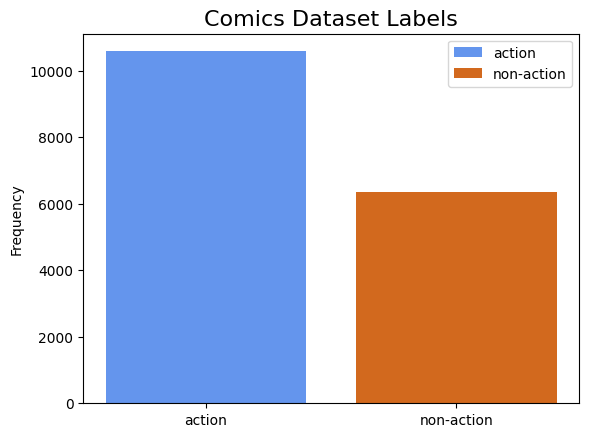

In [122]:
colors = ['cornflowerblue', 'chocolate']

plt.bar(
    comics_labels_count.index, 
    comics_labels_count,
    color=colors,
    label=comics_labels_count.index
)
plt.title('Comics Dataset Labels', fontsize=16)
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [124]:
index = 0
label = 'action'

comic_text = comics_data[comics_data['y'] == label]['description'].tolist()[index]
print(f'Comic Label: {label}\n\nText example: {comic_text}')

Comic Label: action

Text example: CHILDREN OF THE AFTERLIFE! While Kraven the Hunter stalks Jane Foster on Midgard and the newest Valkyrie fights for her soul on Perdita, Karnilla, the queen of Hel, works a miracle in the land of the dead! But Karnilla isn’t Hel’s only ruler—and now she’s upset the cosmic balance. There will be a price to pay…and Karnilla intends to ensure the Valkyries pay it.


In [126]:
comics_data.iloc[:, 1:].describe().T

,count,unique,top,freq
title,16927,16855,100th Anniversary Special (2014) #1,5
description,16927,16927,CONCLUDING THIS CHILLING CHAPTER OF STEPHEN KI...,1
y,16927,2,action,10582


In [128]:
comics_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16927 entries, 0 to 16926
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           16927 non-null  int64 
 1   title        16927 non-null  object
 2   description  16927 non-null  object
 3   y            16927 non-null  object
dtypes: int64(1), object(3)
memory usage: 529.1+ KB


<a name="2.1"></a>
## Feature Engineering

In [130]:
comics_data['sentence_len'] = comics_data['description'].map(lambda x: len(x))
comics_data['word_count'] = comics_data['description'].map(lambda x: len(x.split()))
comics_data['caps_lock_word_count'] = comics_data['description'].map(lambda x: len(re.findall(r'\b[A-Z]+\b', x)))
comics_data.head()

,id,title,description,y,sentence_len,word_count,caps_lock_word_count
0,94799,Demon Days: Mariko (2021) #1 (Variant),IN THE SHADOW OF KIRISAKI MOUNTAIN?A SECRET HI...,non-action,572,95,21
1,93339,The Mighty Valkyries (2021) #3,CHILDREN OF THE AFTERLIFE! While Kraven the Hu...,action,363,64,4
2,94884,The Mighty Valkyries (2021) #3 (Variant),CHILDREN OF THE AFTERLIFE! While Kraven the Hu...,action,363,64,4
3,93350,X-Corp (2021) #2,A SHARK IN THE WATER! After X-CORP’s shocking ...,non-action,298,52,9
4,94896,X-Corp (2021) #2 (Variant),A SHARK IN THE WATER! After X-CORP?s shocking ...,non-action,298,52,9


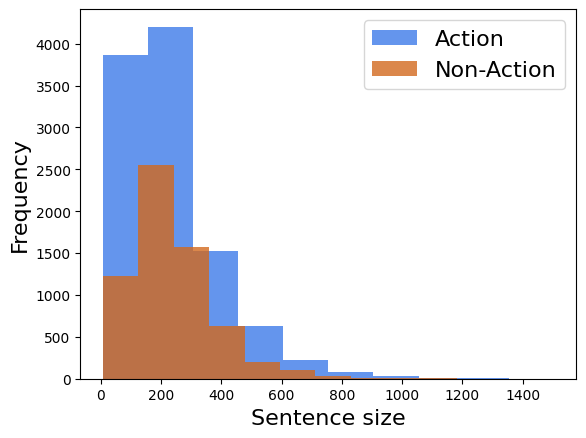

In [136]:
plt.hist(comics_data[comics_data['y'] == 'action']['sentence_len'], label='Action', color=colors[0])
plt.hist(comics_data[comics_data['y'] != 'action']['sentence_len'], label='Non-Action', alpha=.8, color=colors[1])
plt.legend(loc='best', fontsize=16)
plt.xlabel('Sentence size', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.show()

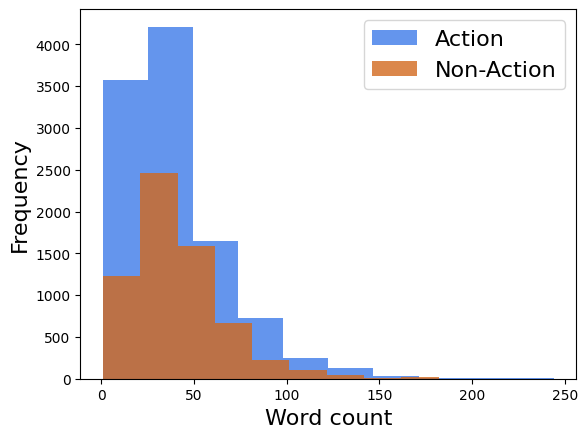

In [132]:
plt.hist(comics_data[comics_data['y'] == 'action']['word_count'], label='Action', color=colors[0])
plt.hist(comics_data[comics_data['y'] != 'action']['word_count'], label='Non-Action', alpha=.8, color=colors[1])
plt.legend(loc='best', fontsize=16)
plt.xlabel('Word count', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.show()

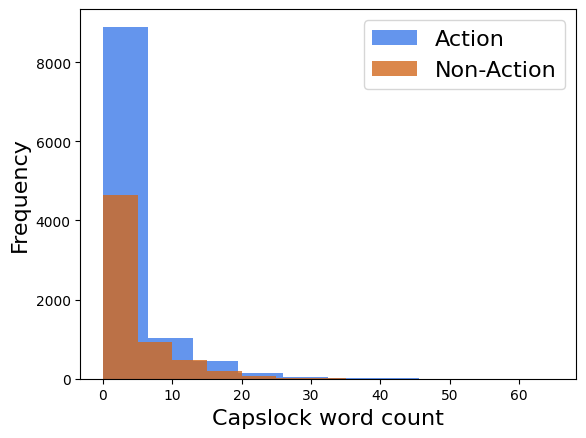

In [134]:
plt.hist(comics_data[comics_data['y'] == 'action']['caps_lock_word_count'], label='Action', color=colors[0])
plt.hist(comics_data[comics_data['y'] != 'action']['caps_lock_word_count'], label='Non-Action', alpha=.8, color=colors[1])
plt.legend(loc='best', fontsize=16)
plt.xlabel('Capslock word count', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.show()